## Instruction
1. Documentation
2. Theoretical assessment: check loss operator(what stock/index they use,linearization...)
 
 check model assumption(student t/ normal)
3. Quantitative assessment: Comput VaR using the recommended model, Back testing

 requirement: adequate, replicable

4. Limitation, comments

5. Final result


## Check list
1. Best model: FHS
2. Back testing, repicate the number of violations & statistical testing (test binomial) binomial? bernolli?
3. Compare our result in 2) with their result in Table2&3 (total violation number and P-value, violation clustering) Table7 yearly violations
4. "VaR exceedings are a point process, they are Poisson distributed." ???

In [ ]:
!pip install statsmodels==0.12.2

     |████████████████████████████████| 9.5 MB 21.2 MB/s 
     |████████████████████████████████| 231 kB 77.1 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
import pandas as pd
import numpy as np
import investpy
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm


ModuleNotFoundError: No module named 'investpy'

In [ ]:
data=pd.read_csv('validation.csv')

In [ ]:
data.Date

0       2011-01-03 00:00:00
1       2011-01-04 00:00:00
2       2011-01-05 00:00:00
3       2011-01-06 00:00:00
4       2011-01-07 00:00:00
               ...         
2512    2021-01-25 00:00:00
2513    2021-01-26 00:00:00
2514    2021-01-27 00:00:00
2515    2021-01-28 00:00:00
2516    2021-01-29 00:00:00
Name: Date, Length: 2517, dtype: object

In [ ]:
# asset: France bond, US CMBL EUR, commodities EUR(CRYTR), Europe Equity(MSCI), AEX, Bist EUR, Nasdaq EUR, Emerging equity EUR,
# we currently assume equal weight

In [ ]:
# This dataframe is in EUR
#L=pd.DataFrame(index=data.Date)
L=pd.DataFrame()
L['France_bond']=data['France All Maturities']
L['US_bond']=data['US CMBL EUR']
L['Commodities']=data['Commodities EUR']
L['Europe_equity']=data['Europe Equity']
L['AEX']=data['AEX']
L['Bist']=data['Bist EUR']
L['Nasdaq']=data['Nasdaq EUR']
L['Emerging_equity']=data['Emerging equity EUR']
L=L.set_index(data.Date) # reset index to Date
# add portfolio loss
L['loss']=L.apply(lambda r: 1/8*(1-np.exp(r.Commodities))+\
                            1/8*(1-np.exp(r.Europe_equity))+\
                            1/8*(1-np.exp(r.AEX))+\
                            1/8*(1-np.exp(r.Bist))+\
                            1/8*(1-np.exp(r.Nasdaq))+\
                            1/8*(1-np.exp(r.Emerging_equity))+\
                            1/8*(1-np.exp(r.France_bond))+\
                            1/8*(1-np.exp(r.US_bond)),
                            axis=1) 
L

In [ ]:
L.index=pd.to_datetime(L.index)

In [ ]:
L

,France_bond,US_bond,Commodities,Europe_equity,AEX,Bist,Nasdaq,Emerging_equity,loss
Date,,,,,,,,,
2011-01-03,0.003159,0.002471,-0.000012,0.007588,0.009774,0.027034,0.014464,0.014587,-0.009966
2011-01-04,0.001261,-0.004326,-0.016313,0.009136,-0.002783,0.021361,-0.008696,-0.000189,0.000012
2011-01-05,-0.003997,-0.012094,0.004165,0.000506,-0.004413,0.020592,-0.002414,-0.000618,-0.000255
2011-01-06,-0.000369,-0.005531,-0.011790,0.003599,-0.001092,0.002400,-0.008152,-0.007841,0.003577
2011-01-07,0.001633,-0.001552,-0.001905,-0.001423,-0.001262,-0.007835,-0.008875,-0.009135,0.003779
...,...,...,...,...,...,...,...,...,...
2021-01-25,0.003644,-0.000912,0.007584,-0.007929,-0.003473,0.005162,0.003466,0.012506,-0.002528
2021-01-26,-0.001555,0.000702,0.005399,0.005760,0.000456,-0.005719,0.000013,-0.017578,0.001540
2021-01-27,0.000566,-0.002603,-0.001094,-0.011079,-0.016258,-0.043466,-0.030227,-0.010130,0.014083


(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   1.,   0.,   1.,   0.,   0.,   1.,   2.,   1.,
          1.,   0.,   1.,   1.,   2.,   1.,   2.,   3.,   7.,   4.,   8.,
          6.,  10.,  10.,  23.,  15.,  25.,  24.,  32.,  49.,  47.,  62.,
        103., 108., 109., 128., 152., 173., 172., 174., 140., 149., 121.,
        107.,  90.,  67.,  62.,  56.,  50.,  35.,  28.,  22.,  18.,  16.,
          9.,  10.,  16.,  12.,   8.,   6.,   2.,   9.,   2.,   3.,   1.,
          1.,   2.,   1.,   0.,   1.,   1.,   1.,   0.,   0.,   1.,   0.,
          0.,   0.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,
          1.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

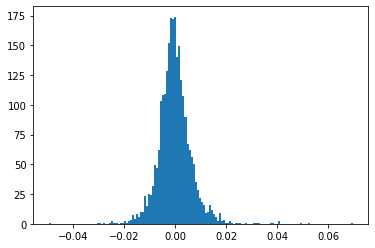

In [ ]:
plt.hist(L.loss,bins=150)

/root/venv/lib/python3.7/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


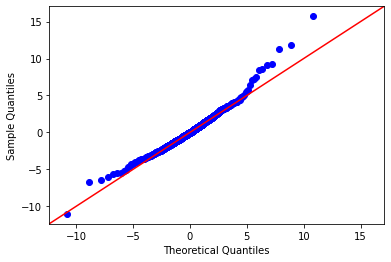

In [ ]:
sm.qqplot(L['loss'], stats.t, distargs=(4.5,),fit=True, line="45")
plt.savefig('vali_student45.jpg',dpi=100)

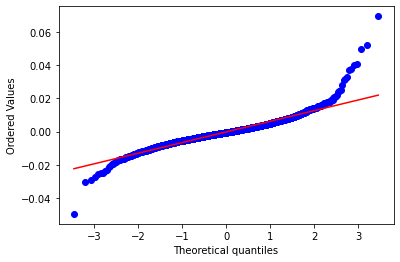

In [ ]:
stats.probplot(L['loss'], dist="norm",plot=plt)
plt.title('')
plt.savefig('vali_normal.jpg',dpi=100)

In [ ]:
def filter_hist(stock,df):
    lambda_hist=0.94
    result = pd.DataFrame(columns = [stock,'variance','vola'])
    result[stock]=df[stock]
    result['variance'][0]=0
    #result['variance'][1]=result[stock][1]**2
    #result['vola'][1] = result[stock][1]
    # result['variance'][1]=np.var(result[stock][0:50])
    # result['vola'][1] = np.sqrt(result[stock][0:50])
    result['variance'][1]=np.var(result[stock][0:50])
    result['vola'][1] = np.std(result[stock][0:50])
    
    for i in np.arange(2,len(result),1):
        result['variance'][i] = lambda_hist * (result['vola'][i-1]**2) + (1-lambda_hist)*(result[stock][i-1]**2)
        result['vola'][i] = np.sqrt(result['variance'][i])

    #result['variance'][1]=result[stock][1]**2
    #result['vola'][1] = result[stock][1]
    # result['variance'][1]=np.var(result[stock][0:50])
    # result['vola'][1] = np.sqrt(result[stock][0:50])
    result['variance'][1]=np.var(result[stock][0:50])
    result['vola'][1] = np.std(result[stock][0:50])
    result['riskfactor'] = result[stock]/result['vola']
    return result.dropna()

# def filter_hist(stock,df):
#     lambda_hist=0.94
#     result = pd.DataFrame(columns = [stock,'variance','vola'])
#     result[stock]=df[stock]
#     result['variance'][0]=0
#     result['variance'][1]=result[stock][1]**2
#     result['vola'][1] = result[stock][1]
    
#     for i in np.arange(2,len(result),1):
#         result['variance'][i] = lambda_hist * (result['vola'][i-1]**2) + (1-lambda_hist)*(result[stock][i-1]**2)
#         result['vola'][i] = np.sqrt(result['variance'][i])
#     result['variance'][1]=result[stock][1]**2
    
#     result['vola'][1]= np.sqrt(result['variance'][1])
#     result['riskfactor'] = result[stock]/result['vola']
#     return result.dropna()


def filter_simulation(df,k):
    franceresult=filter_hist('France_bond',df)
    usresult=filter_hist('US_bond',df)
    comresult=filter_hist('Commodities',df)
    euroresult=filter_hist('Europe_equity',df)
    aexresult=filter_hist('AEX',df)
    bistresult=filter_hist('Bist',df)
    nasresult=filter_hist('Nasdaq',df)
    emeresult=filter_hist('Emerging_equity',df)
    
    portfolio = pd.DataFrame(columns = ['port'])
    portfolio['port'] = np.arange(0,len(aexresult),1)
    portfolio['VaR_975'] = np.arange(0,len(aexresult),1)
    portfolio['VaR_99'] = np.arange(0,len(aexresult),1)
    portfolio['ES_99'] = np.arange(0,len(aexresult),1)
    portfolio['ES_975'] = np.arange(0,len(aexresult),1)
    portfolio.index =franceresult.index
    
    for i in range(0,len(franceresult)-k,1):
        franceresult_value_risk = franceresult['vola'][i+k]*franceresult['riskfactor'][i:i+k]*1/8
        usresult_value_risk = usresult['vola'][i+k]*usresult['riskfactor'][i:i+k]*1/8
        aexresult_value_risk = aexresult['vola'][i+k]*aexresult['riskfactor'][i:i+k]*1/8
        euroresult_value_risk = euroresult['vola'][i+k]*euroresult['riskfactor'][i:i+k]*1/8
        comresult_value_risk = comresult['vola'][i+k]*comresult['riskfactor'][i:i+k]*1/8
        bistresult_value_risk = bistresult['vola'][i+k]*bistresult['riskfactor'][i:i+k]*1/8
        nasresult_value_risk = nasresult['vola'][i+k]*nasresult['riskfactor'][i:i+k]*1/8
        emeresult_value_risk = emeresult['vola'][i+k]*emeresult['riskfactor'][i:i+k]*1/8
        
        value_risk = franceresult_value_risk+ usresult_value_risk+ aexresult_value_risk+euroresult_value_risk+ comresult_value_risk+ bistresult_value_risk + nasresult_value_risk + emeresult_value_risk
        portfolio.VaR_975[i+k:i+k+1] = value_risk.quantile(q=0.975)
        portfolio.VaR_99[i+k:i+k+1] = value_risk.quantile(q=0.99)
        portfolio.ES_975[i+k:i+k+1] =  value_risk[value_risk >= value_risk.quantile(q=0.975)].mean()
        portfolio.ES_99[i+k:i+k+1] =  value_risk[value_risk >= value_risk.quantile(q=0.99)].mean()
    return portfolio[k:]

In [ ]:
fhs_roll_daily = filter_simulation(L.iloc[:,:8],k=500)
fhs_roll_daily

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

,port,VaR_975,VaR_99,ES_99,ES_975
Date,,,,,
2013-01-07,500,0.009515,0.012185,0.014888,0.012387
2013-01-08,501,0.009305,0.011912,0.014586,0.012135
2013-01-09,502,0.009104,0.011669,0.014272,0.011871
2013-01-10,503,0.008986,0.011466,0.014065,0.011707
2013-01-11,504,0.009085,0.011657,0.014361,0.011938
...,...,...,...,...,...
2021-01-25,2511,0.009472,0.011883,0.013306,0.011555
2021-01-26,2512,0.009342,0.011844,0.013113,0.011417
2021-01-27,2513,0.009231,0.011769,0.012998,0.011327


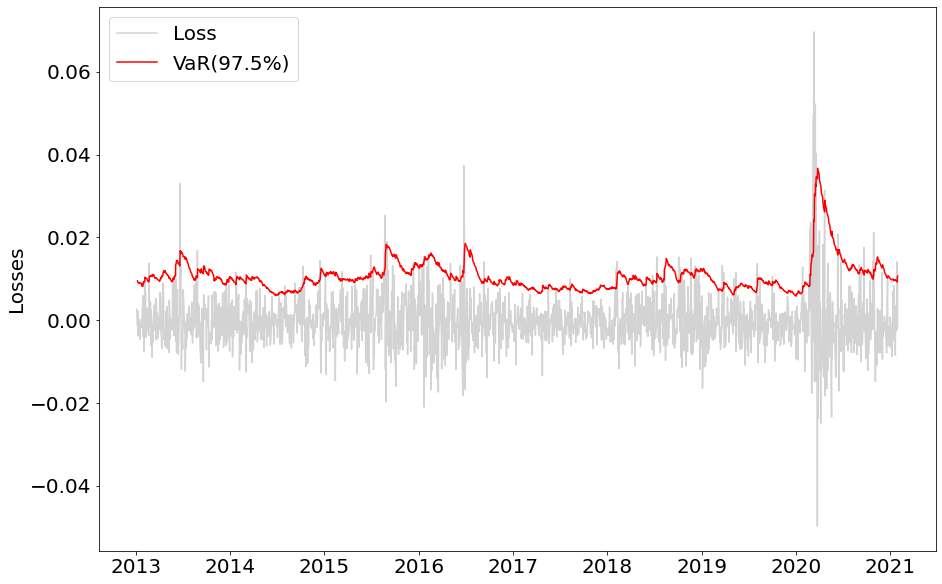

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(L.loss[500:],label='Loss',color='lightgray',zorder=1)
plt.plot(fhs_roll_daily['VaR_975'],c='red',label='VaR(97.5%)',zorder=2)
#plt.plot(fhs_roll_daily['VaR_99'],c='blue',label='VaR(99%)',zorder=2)
#plt.plot(fhs_roll_daily['ES_975'],c='orange',label='ES(97.5%)',zorder=3)
#plt.plot(fhs_roll_daily['ES_99'],c='green',label='ES(99%)',zorder=1)
plt.ylabel('Losses',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='best', prop={'size': 20})
#plt.savefig('fhs result',dpi=400)
plt.show()

In [ ]:
# fhs violation per year-97.5%
Loss_dist=L.loss[500:]
fhs_violation=[]
for i in range(0,int(len(Loss_dist)/250)):
    bool_list = [Loss_dist[j+1]>fhs_roll_daily['VaR_975'][j] for j in range(i*250,(i+1)*250)]
    index = np.where(bool_list)[0]
    count = len(index)
    #print(i,":",count)
    fhs_violation.append(count)
bool_list = [Loss_dist[j+1]>fhs_roll_daily['VaR_975'][j] for j in range(2000,2016)]
index = np.where(bool_list)[0]
count = len(index)
fhs_violation.append(count)
print(fhs_violation)

[8, 7, 8, 7, 2, 12, 11, 17, 2]


In [ ]:
stats.binom_test(np.sum(fhs_violation),n=2016,p=0.025)

0.0016178267390868277

In [ ]:
fhs_es_true=[]
fhs_es_esti=[]
for i in range(0,int(len(Loss_dist)/250)):
    true_ES= np.mean(Loss_dist[1+i*250:1+(i+1)*250][Loss_dist[1+i*250:1+(i+1)*250]>fhs_roll_daily.VaR_975[i*250:(i+1)*250]])
    fhs_es_true.append(true_ES)
    estimate_ES= np.mean(fhs_roll_daily.ES_975[i*250:(i+1)*250])
    fhs_es_esti.append(estimate_ES)
true_ES= np.mean(Loss_dist[1501:1742][Loss_dist[1501:1742]>fhs_roll_daily.VaR_975[1500:1741]])
fhs_es_true.append(true_ES)
estimate_ES= np.mean(fhs_roll_daily.ES_975[1500:1741])
fhs_es_esti.append(estimate_ES)
print(fhs_es_true)
print(fhs_es_esti)

In [ ]:
stats.kstest(fhs_es_true,fhs_es_esti)

In [ ]:
Loss_dist

Date
2013-01-04 00:00:00    0.002665
2013-01-07 00:00:00   -0.001414
2013-01-08 00:00:00    0.002232
2013-01-09 00:00:00   -0.003751
2013-01-10 00:00:00   -0.002098
                         ...   
2021-01-25 00:00:00   -0.002528
2021-01-26 00:00:00    0.001540
2021-01-27 00:00:00    0.014083
2021-01-28 00:00:00   -0.001923
2021-01-29 00:00:00    0.011439
Name: loss, Length: 2017, dtype: float64

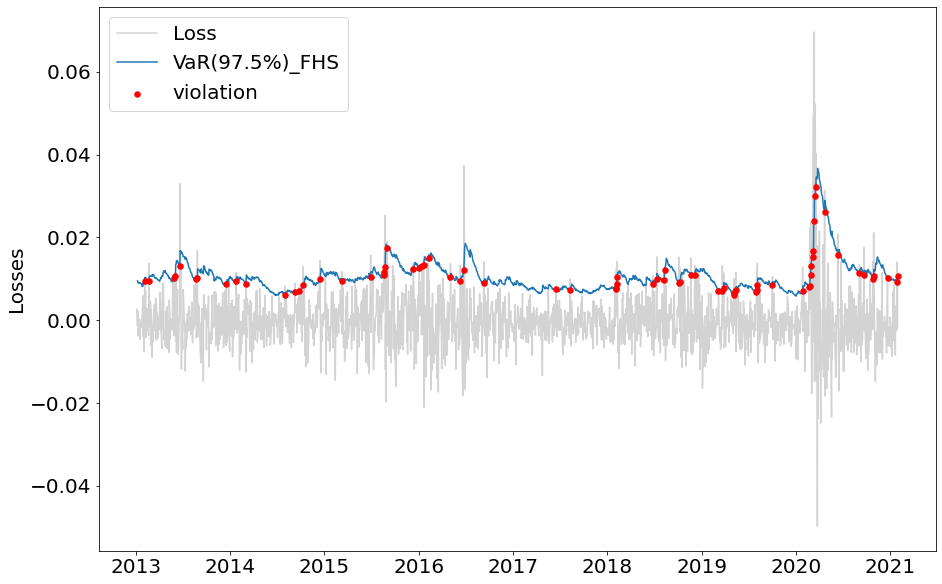

In [ ]:
Loss_dist=L.loss[501:]
plt.figure(figsize=(15,10))
plt.plot(L.loss[500:],label='Loss',color='lightgray', zorder=1) #2014-4-9/2021-4-1
plt.plot(fhs_roll_daily['VaR_975'],label='VaR(97.5%)_FHS', zorder=2)
plt.scatter(fhs_roll_daily.VaR_975[Loss_dist>fhs_roll_daily.VaR_975].index,
            fhs_roll_daily.VaR_975[Loss_dist>fhs_roll_daily.VaR_975].values,
            marker='o',c='r',s=30, label='violation', zorder=3)
plt.ylabel('Losses',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='best', prop={'size': 20})
plt.savefig('Violation_FHS_975',dpi=400)
plt.show()

In [ ]:
L.index=pd.to_datetime(L.index)

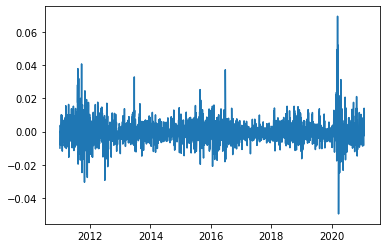

In [ ]:
plt.plot(L.loss)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fcc26451-aff8-41a3-9390-dc5b21d8ee4a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>